In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
gpp=pd.read_csv(r'C:\Users\Admin\Desktop\data work chinar\Final project\database_IND.csv')

In [3]:
from IPython.display import display
with pd.option_context('display.max_columns', 100):
    display(gpp)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# working on cleaning the data to be able to interpret the details

as the entire details revolve around the power plants across"India" you do not need the "country","country_long" as it is constant throughout the data and dropping url too as that is not important during our analysis

In [4]:
gpp.drop(['country','country_long','url',"wepp_id","generation_gwh_2013","generation_gwh_2019","estimated_generation_gwh","geolocation_source","other_fuel3","other_fuel2","year_of_capacity_data","generation_data_source","gppd_idnr"],axis=1,inplace=True)

In [5]:
gpp

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,NaN,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,NaN,NaN,NaN,NaN,NaN


In [6]:
gpp.isnull().sum()

name                     0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
owner                  565
source                   0
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

# columns:"wepp_id","generation_gwh_2013","generation_gwh_2019"."estimated_generation_gwh" are empty and have no values throughout hence removed post review of null values also other fuel 3,2, &"geolocation_source"does not have much supporting values

In [7]:
for i in gpp.columns:
    print(gpp[i].value_counts())
    print('\n')

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64


5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     1
Name: latitude, Length: 836, dtype: int64


71.6917    4
75.8988    3
71.6918    3
72.8983    3
81.2875    3
          ..
70.3961    1
74.2393    1
77.0435    1
73.8254    1
77.4768    1
Name: longitude, Length: 827, dtype: int64


Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
B

In [8]:
gpp.replace(" ", "")

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,NaN,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,NaN,NaN,NaN,NaN,NaN


In [9]:
gpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 907 non-null    object 
 1   capacity_mw          907 non-null    float64
 2   latitude             861 non-null    float64
 3   longitude            861 non-null    float64
 4   primary_fuel         907 non-null    object 
 5   other_fuel1          198 non-null    object 
 6   commissioning_year   527 non-null    float64
 7   owner                342 non-null    object 
 8   source               907 non-null    object 
 9   generation_gwh_2014  398 non-null    float64
 10  generation_gwh_2015  422 non-null    float64
 11  generation_gwh_2016  434 non-null    float64
 12  generation_gwh_2017  440 non-null    float64
 13  generation_gwh_2018  448 non-null    float64
dtypes: float64(9), object(5)
memory usage: 99.3+ KB


In [10]:
gpp1=gpp.drop_duplicates()

In [11]:
gpp1

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,NaN,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,NaN,NaN,NaN,NaN,NaN


initially we had 907 entries and 27 columns, we dropped all the unneccassary columns to work with 14 columns. we see some null values that we will work upon as we move further. we have removed the whitespaces & duplicates till this point 

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
encoder = LabelEncoder()
gpp1['primary_fuel'] = encoder.fit_transform(gpp1['primary_fuel'])
gpp1['source'].fillna(gpp1['source'].mode()[0], inplace=True)
gpp1['owner'].fillna(gpp1['owner'].mode()[0], inplace=True)

In [14]:
gpp1.fillna(gpp1.median()[0], inplace=True)

In [15]:
gpp1.isnull().sum()

name                   0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
owner                  0
source                 0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [16]:
gpp1.describe()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,23.125256,76.538572,3.206174,1185.185226,1100.329205,1161.437454,1211.781915,1266.439354,1314.589897
std,590.085456,10.322840,6.263960,2.280652,956.750996,2914.072352,3094.143089,3119.562531,3175.490873,3286.682207
min,0.000000,8.168900,59.200000,0.000000,59.200000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,73.811550,1.000000,59.200000,59.200000,59.200000,59.200000,59.200000,59.200000
50%,59.200000,22.142100,76.493800,3.000000,1978.000000,59.200000,59.200000,59.200000,59.200000,59.200000
75%,385.250000,26.753750,79.206100,6.000000,2003.000000,556.562750,598.926350,670.039394,709.290725,687.754000
max,4760.000000,59.200000,95.408000,7.000000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


Here we see that the data has skewness and outliers with high std. we will have to work on standardizing the data

In [17]:
gpp1

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,6,59.2,2011.0,Solar Paces,National Renewable Energy Laboratory,59.200000,59.200000,59.200000,59.200000,59.200000
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,1,59.2,59.2,Ultratech Cement ltd,Ultratech Cement ltd,59.200000,59.200000,59.200000,59.200000,59.200000
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,7,59.2,59.2,AES,CDM,59.200000,59.200000,59.200000,59.200000,59.200000
3,AGARTALA GT,135.0,23.8712,91.3602,2,59.2,2004.0,Acc Acc ltd,Central Electricity Authority,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,21.9603,82.4091,1,Oil,2015.0,Acc Acc ltd,Central Electricity Authority,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,1,Oil,2016.0,Acc Acc ltd,Central Electricity Authority,59.200000,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,6,59.2,59.2,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,59.200000,59.200000,59.200000,59.200000,59.200000
904,Yelisirur wind power project,25.5,15.2758,75.5811,7,59.2,59.2,Acc Acc ltd,CDM,59.200000,59.200000,59.200000,59.200000,59.200000
905,ZAWAR MINES,80.0,24.3500,73.7477,1,59.2,59.2,Hindustan Zinc ltd,Hindustan Zinc ltd,59.200000,59.200000,59.200000,59.200000,59.200000


<AxesSubplot: >

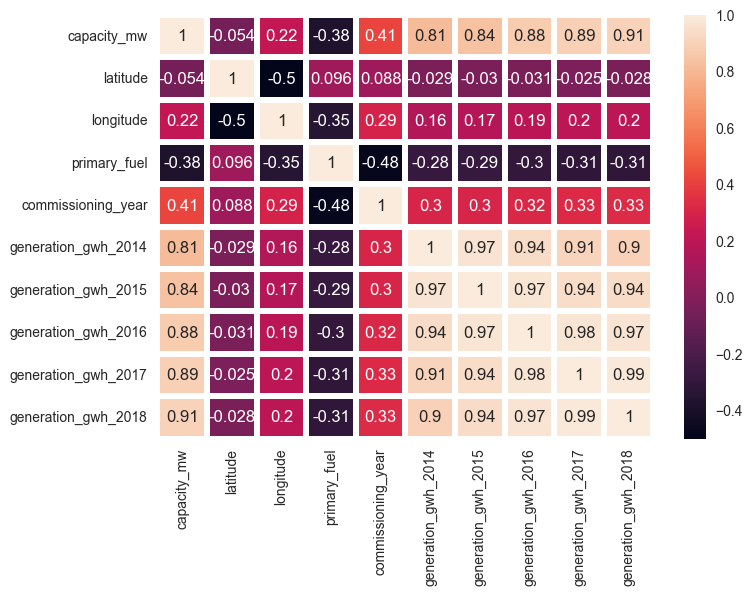

In [56]:
sns.heatmap(gpp1.corr(),annot=True, linewidth=3)

Here we can notice generation_gwh_2014,....2015,...2016 ,...2017 ,....2018 are positively correlated to capacity_mw.

<AxesSubplot: xlabel='capacity_mw', ylabel='generation_gwh_2014'>

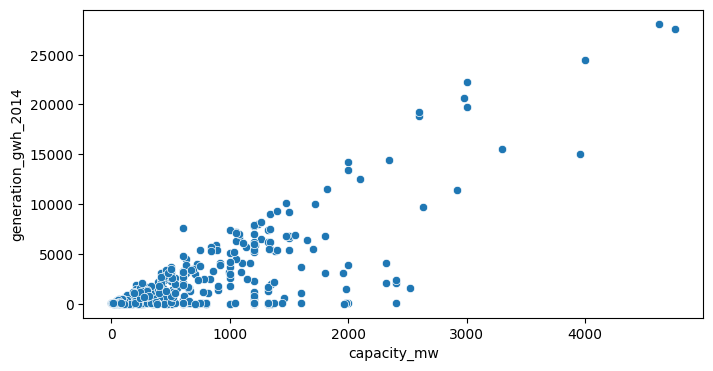

In [19]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',data=gpp1)

<AxesSubplot: xlabel='capacity_mw', ylabel='generation_gwh_2015'>

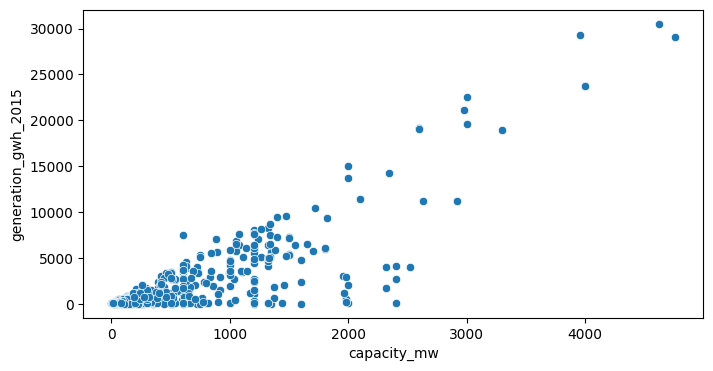

In [20]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',data=gpp1)

<AxesSubplot: xlabel='capacity_mw', ylabel='generation_gwh_2016'>

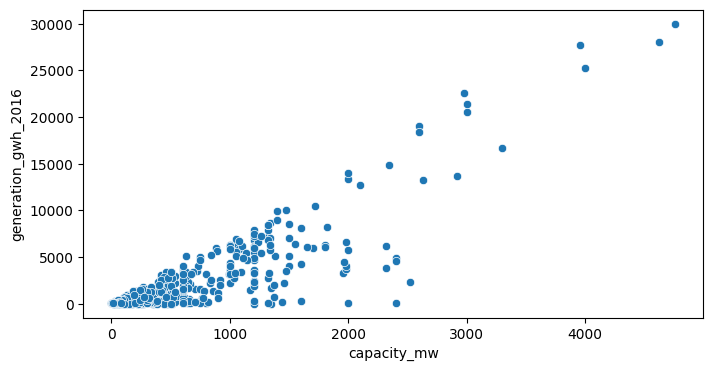

In [21]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data=gpp1)

<AxesSubplot: xlabel='capacity_mw', ylabel='generation_gwh_2017'>

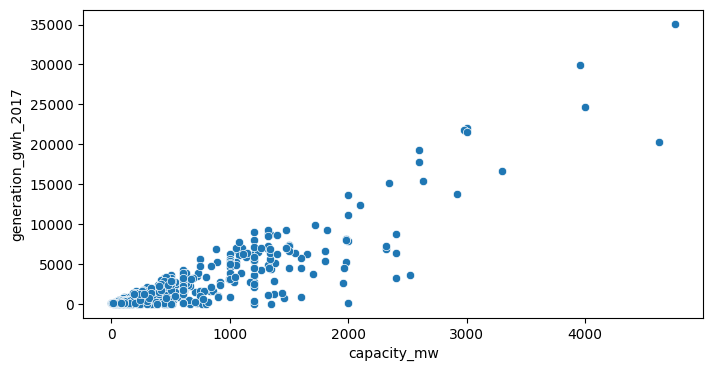

In [22]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',data=gpp1)

<AxesSubplot: xlabel='capacity_mw', ylabel='generation_gwh_2018'>

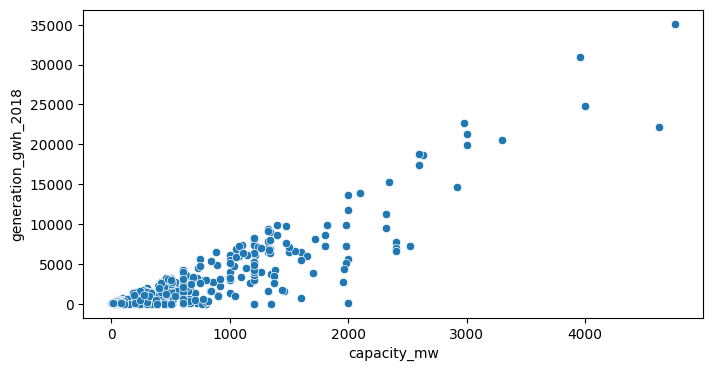

In [23]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2018',data=gpp1)

In [24]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (14, 4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

1    258
3    251
6    127
7    123
2     69
0     50
5     20
4      9
Name: primary_fuel, dtype: int64


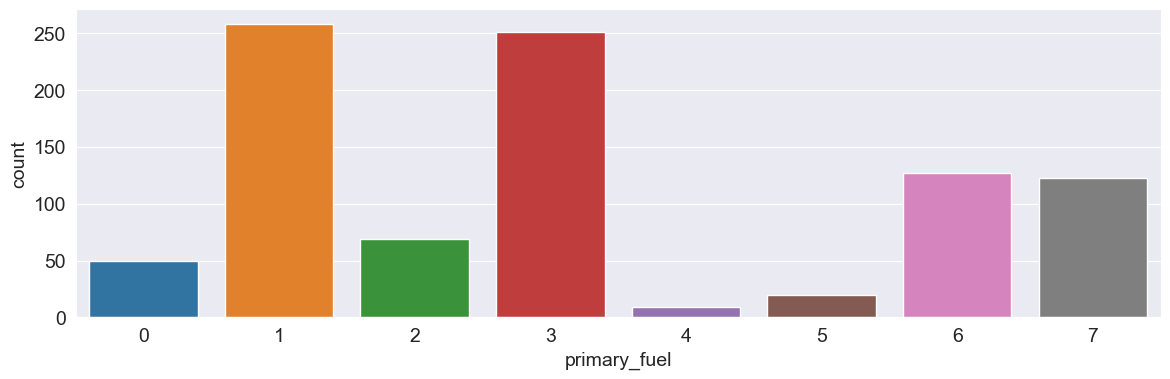

In [25]:
print(gpp1["primary_fuel"].value_counts())
sns.countplot(x="primary_fuel",data=gpp1)
plt.show()

In [26]:
main_primary_fuel = gpp1.primary_fuel.value_counts() * 100 / gpp1.primary_fuel.count()
main_primary_fuel

1    28.445424
3    27.673649
6    14.002205
7    13.561191
2     7.607497
0     5.512679
5     2.205072
4     0.992282
Name: primary_fuel, dtype: float64

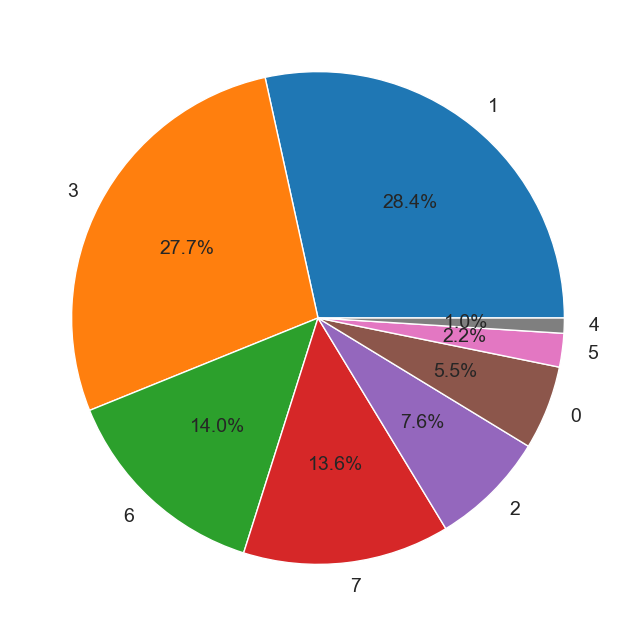

In [27]:
fig = plt.figure(figsize=(10, 8))
plt.pie(main_primary_fuel, labels=main_primary_fuel.index,autopct='%1.1f%%');

We see a hugh dependency on non renewable source:- Coal, but also see a good sign as a shift to renewable cumulatively being nearing 58% 

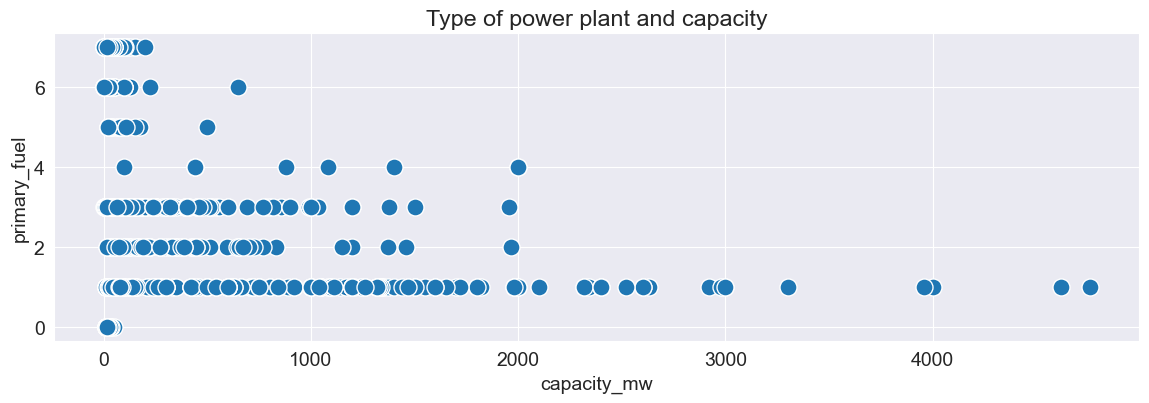

In [28]:
sns.scatterplot(x = gpp1.capacity_mw, y = gpp1.primary_fuel, s = 150)
plt.title('Type of power plant and capacity');

In [29]:
company_capacity = gpp1.groupby(['name', 'primary_fuel'])[['capacity_mw']].sum().sort_values('capacity_mw', ascending=False).head(20)
company_capacity

,,capacity_mw
name,primary_fuel,
VINDH_CHAL STPS,1,4760.0
MUNDRA TPP,1,4620.0
MUNDRA UMPP,1,4000.0
SASAN UMPP,1,3960.0
TIRORA TPP,1,3300.0
RIHAND,1,3000.0
TALCHER STPS,1,3000.0
SIPAT STPS,1,2980.0
CHANDRAPUR_Coal,1,2920.0


Here we see  high dependency on coal for energy generation.grouped top 20 companies with the higher MW production

will scale the data and remove the skewness and outliers now

In [30]:
gpp1.drop(["name","owner","source","other_fuel1"],axis=1,inplace=True)

In [31]:
gpp1

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,59.200000,59.200000,59.200000,59.200000,59.200000
1,98.0,24.7663,74.6090,1,59.2,59.200000,59.200000,59.200000,59.200000,59.200000
2,39.2,21.9038,69.3732,7,59.2,59.200000,59.200000,59.200000,59.200000,59.200000
3,135.0,23.8712,91.3602,2,2004.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.0,59.200000,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,59.2,59.200000,59.200000,59.200000,59.200000,59.200000
904,25.5,15.2758,75.5811,7,59.2,59.200000,59.200000,59.200000,59.200000,59.200000
905,80.0,24.3500,73.7477,1,59.2,59.200000,59.200000,59.200000,59.200000,59.200000


checking distribution for treating outliers and skewness

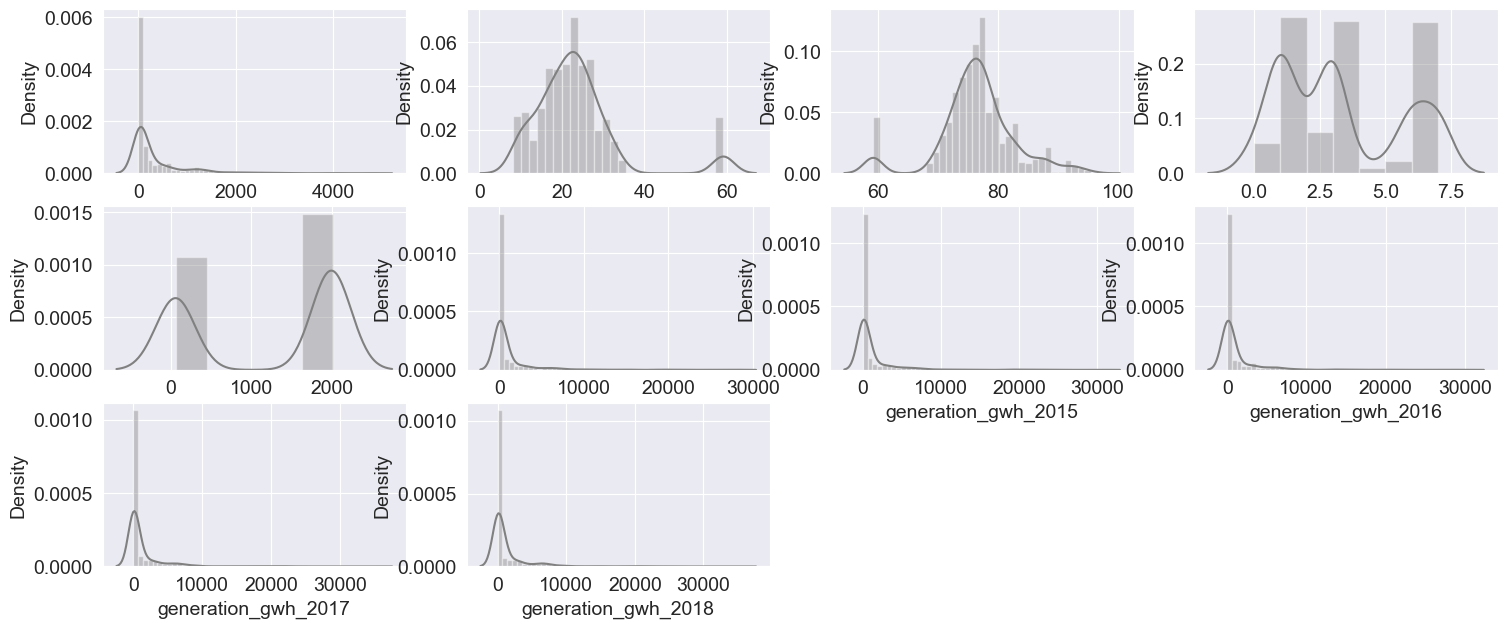

In [32]:
plt.figure(figsize=(18,20))
for i in enumerate(gpp1):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(gpp1[i[1]],color='grey')

In [33]:
from scipy.stats import zscore

In [34]:
z = np.abs(zscore(gpp1[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','capacity_mw']]))
threshold = 3
df = gpp1[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ",gpp1.shape)
print ("Shape of the dataframe after removing outliers: ", df.shape)
print ("Percentage of data loss post outlier removal: ", (gpp1.shape[0]-df.shape[0])/gpp1.shape[0]*100)

Shape of the dataframe before removing outliers:  (907, 10)
Shape of the dataframe after removing outliers:  (882, 10)
Percentage of data loss post outlier removal:  2.7563395810363835


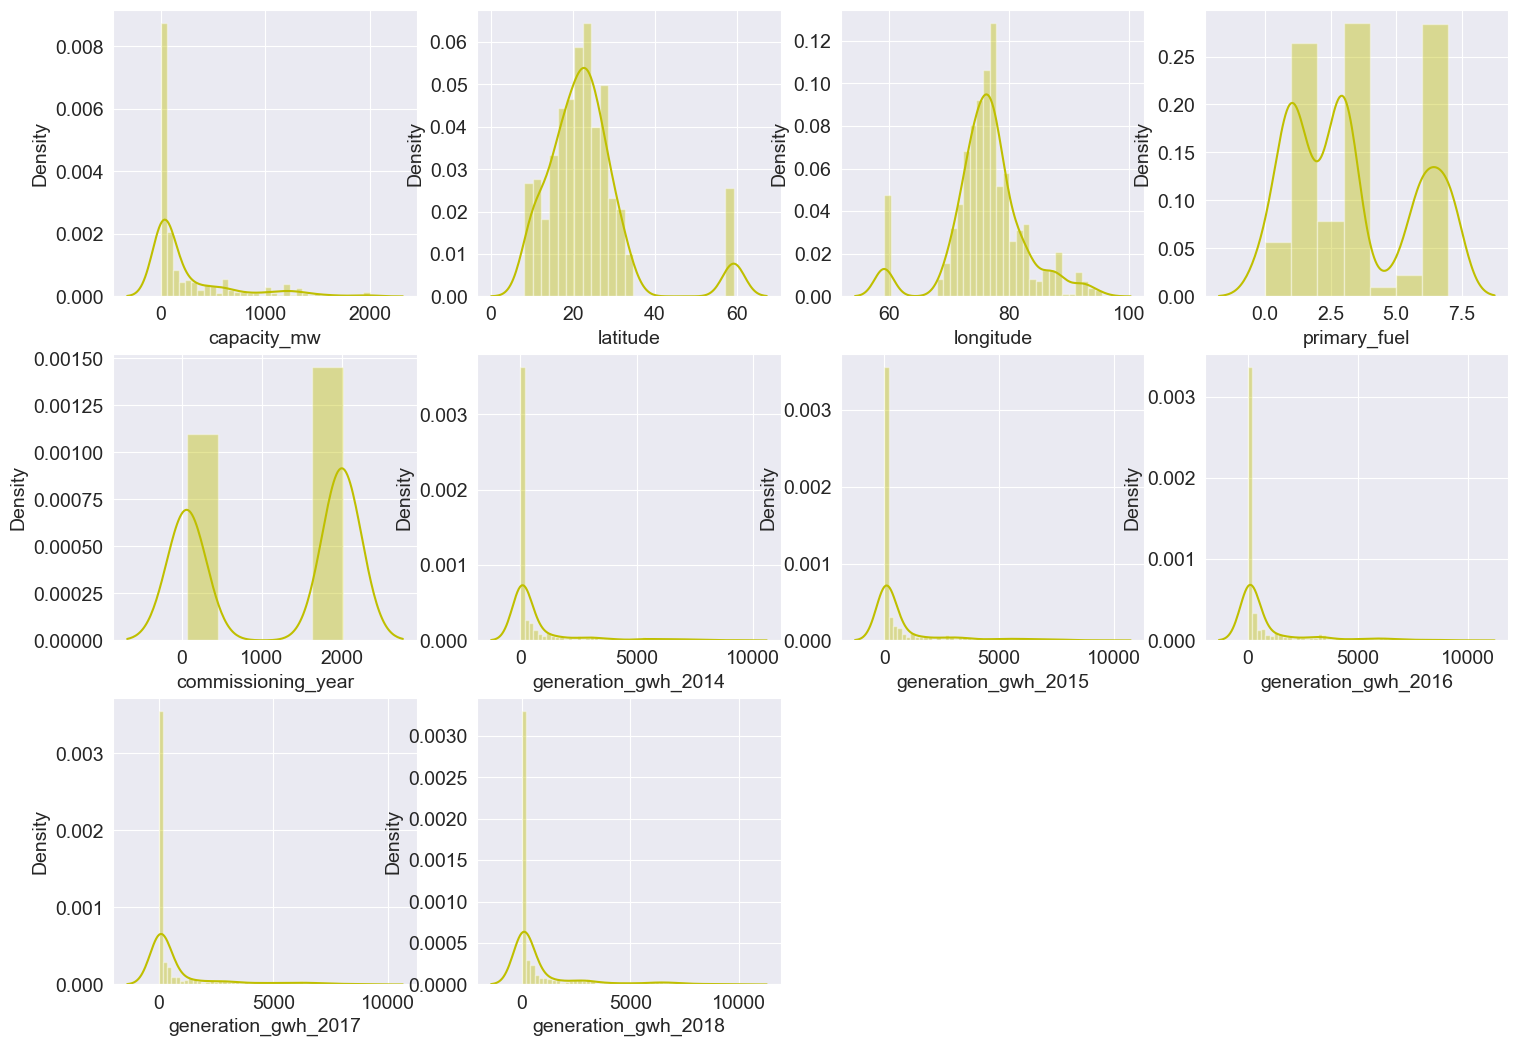

In [35]:
plt.figure(figsize=(18,35))
for i in enumerate(df):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='y')

In [36]:
df.skew()

capacity_mw            2.054665
latitude               1.914796
longitude             -0.275375
primary_fuel           0.428186
commissioning_year    -0.279248
generation_gwh_2014    2.885639
generation_gwh_2015    2.711018
generation_gwh_2016    2.651120
generation_gwh_2017    2.563221
generation_gwh_2018    2.615528
dtype: float64

In [37]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,59.200000,59.200000,59.200000,59.200000,59.200000
1,98.0,24.7663,74.6090,1,59.2,59.200000,59.200000,59.200000,59.200000,59.200000
2,39.2,21.9038,69.3732,7,59.2,59.200000,59.200000,59.200000,59.200000,59.200000
3,135.0,23.8712,91.3602,2,2004.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.0,59.200000,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,59.2,59.200000,59.200000,59.200000,59.200000,59.200000
904,25.5,15.2758,75.5811,7,59.2,59.200000,59.200000,59.200000,59.200000,59.200000
905,80.0,24.3500,73.7477,1,59.2,59.200000,59.200000,59.200000,59.200000,59.200000


In [38]:
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
sc=MinMaxScaler()
x=sc.fit_transform(x)

# we would 1st work on regression model followed by classification model

In [41]:
from pycaret.regression import *
s=setup(gpp1, target = 'capacity_mw')

,Description,Value
0,Session id,1896
1,Target,capacity_mw
2,Target type,Regression
3,Original data shape,"(907, 10)"
4,Transformed data shape,"(907, 10)"
5,Transformed train set shape,"(634, 10)"
6,Transformed test set shape,"(273, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [42]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,108.8421,43617.9816,205.7763,0.8687,0.8609,1.8398,0.0390
gbr,Gradient Boosting Regressor,116.7727,49679.2636,218.8796,0.8489,1.0170,2.1423,0.0360
rf,Random Forest Regressor,113.6867,50274.4220,220.0924,0.8470,0.8687,1.4078,0.0720
knn,K Neighbors Regressor,117.8131,57575.4289,238.6788,0.8236,0.9265,1.5893,0.0080
xgboost,Extreme Gradient Boosting,124.7137,59960.6449,240.0125,0.8220,0.9470,1.8183,0.0330
lightgbm,Light Gradient Boosting Machine,130.8638,63932.2287,250.0843,0.8173,1.0692,2.1011,0.0520
lr,Linear Regression,155.6944,71552.4705,263.6824,0.7889,1.3576,3.5586,0.3960
lasso,Lasso Regression,155.5609,71557.4680,263.6821,0.7889,1.3536,3.5475,0.0060
llar,Lasso Least Angle Regression,155.5613,71557.8203,263.6829,0.7889,1.3536,3.5475,0.0050
ridge,Ridge Regression,155.6901,71552.4166,263.6823,0.7889,1.3575,3.5583,0.0060


In [43]:
print(best)

ExtraTreesRegressor(n_jobs=-1, random_state=1896)


In [44]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [45]:
et_final= finalize_model('et')

In [46]:
save_model(et_final,"Global_capacity")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['latitude', 'longitude',
                                              'primary_fuel',
                                              'commissioning_year',
                                              'generation_gwh_2014',
                                              'generation_gwh_2015',
                                              'generation_gwh_2016',
                                              'generation_gwh_2017',
                                              'generation_gwh_2018'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  ExtraTreesRegressor(n_jobs=-1, random_state=1896))]),
 'Global_capac

# Classification 

In [47]:
from pycaret.classification import *
s=setup(gpp1, target = 'primary_fuel')

,Description,Value
0,Session id,496
1,Target,primary_fuel
2,Target type,Multiclass
3,Original data shape,"(907, 10)"
4,Transformed data shape,"(907, 10)"
5,Transformed train set shape,"(634, 10)"
6,Transformed test set shape,"(273, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [48]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7823,0.5729,0.7823,0.7845,0.7693,0.7222,0.7267,0.4060
xgboost,Extreme Gradient Boosting,0.7808,0.5744,0.7808,0.7798,0.7669,0.7202,0.7240,0.0670
rf,Random Forest Classifier,0.7761,0.5752,0.7761,0.7706,0.7621,0.7148,0.7183,0.0510
et,Extra Trees Classifier,0.7729,0.5752,0.7729,0.7708,0.7572,0.7096,0.7137,0.0460
gbc,Gradient Boosting Classifier,0.7587,0.5738,0.7587,0.7592,0.7492,0.6936,0.6972,0.3310
dt,Decision Tree Classifier,0.7035,0.4913,0.7035,0.7072,0.6966,0.6264,0.6293,0.0060
knn,K Neighbors Classifier,0.6499,0.5343,0.6499,0.6233,0.6271,0.5520,0.5563,0.0110
lr,Logistic Regression,0.5648,0.5231,0.5648,0.5276,0.5292,0.4447,0.4536,0.0580
ridge,Ridge Classifier,0.5441,0.0000,0.5441,0.4828,0.4829,0.4139,0.4341,0.0050
lda,Linear Discriminant Analysis,0.5300,0.5100,0.5300,0.5080,0.4829,0.4011,0.4184,0.0060


In [49]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=496, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


In [50]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [53]:
lightgbm_final=finalize_model('lightgbm')

In [54]:
save_model(lightgbm_final,"Global_Primary-fuel")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['capacity_mw', 'latitude',
                                              'longitude', 'commissioning_year',
                                              'generation_gwh_2014',
                                              'generation_gwh_2015',
                                              'generation_gwh_2016',
                                              'generation_gwh_2017',
                                              'generation_gwh_2018'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               ke...
                  LGBMClassifier(boosting_type='gbdt', class_we